In [2]:
import cv2
import skimage as io
import matplotlib.pyplot as plt

In [3]:
#function which takes an image as an input and gives its clahe form as Output (all in Grayscale format)
def equ_clahe(filepath,clip_limit):
    img=cv2.imread(filepath,1)
    grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    equ_img=cv2.equalizeHist(grey_img)
    clahe=cv2.createCLAHE(clipLimit=clip_limit,tileGridSize=(5,5))
    clahe_img=clahe.apply(grey_img)
    return grey_img,equ_img,clahe_img
    

In [4]:
#function to plot equalized image and CLAHE image
def plot(img1,img2):
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(img1,cmap='gray')

    plt.subplot(1,2,2)
    plt.title("CLAHE Image")
    plt.imshow(img2,cmap='gray')


In [5]:
#function to plot histogram representations of images
def hist_plot(img1,img2):
    plt.subplot(1,2,1)
    plt.title("Image1_hist")
    plt.hist(img1.ravel(),256,[0,256]);  

    plt.subplot(1,2,2)
    plt.title("Image2_hist")
    plt.hist(img2.ravel(),256,[0,256]);  

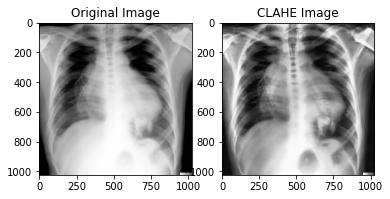

In [6]:
img,equ_img,clahe_img=equ_clahe('C:\Medical Image Enhancement\images\lc_Xray.png',5.0)
plot(img,clahe_img)

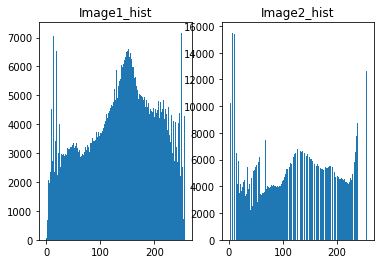

In [7]:
hist_plot(clahe_img,equ_img)

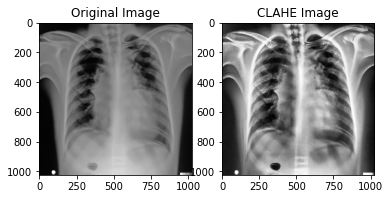

In [8]:
img_1,equ_img_1,clahe_img_1=equ_clahe('C:\Medical Image Enhancement\images\lc_xray_1.png',6.0)
plot(img_1,clahe_img_1)

In [9]:
std1=img_1.std()
std2=clahe_img_1.std()
print(std1)
print(std2)

51.14082915846688
64.50859655181415


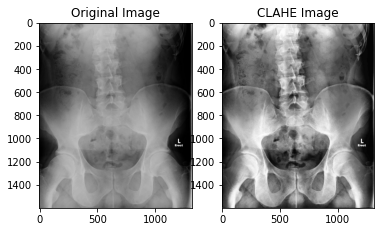

In [10]:
img_2,equ_img_2,clahe_img_2=equ_clahe('C:\Medical Image Enhancement\images\R.jpg',4.0)
plot(img_2,clahe_img_2)

In [11]:
std1=img_2.std()
std2=clahe_img_2.std()
print(std1)
print(std2)

53.3976592589771
61.08060410806976


In [12]:
import numpy as np

In [13]:
def MSE(img1, img2):
        squared_diff = np.square(img1 -img2)
        summed = np.sum(squared_diff)
        num_pix = img1.shape[0] * img1.shape[1] #img1 and 2 should have same shape
        err = summed / num_pix
        return err

In [14]:
error=MSE(img_2,clahe_img_2)
print("Error clahe: "+str(error))
error_1=MSE(img_2,equ_img_2)
print("Error img2: "+str(error_1))

Error clahe: 101.83577935030395
Error img2: 86.18425294452888
